In [55]:
!pip install numpy seaborn


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [8]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import datetime

sns.set_theme()

yash_ip = "10.104.168.213" # I (Yash) logged in

START_DATE = datetime.datetime(2024, 4, 24)

TIME_COL = "Time"
IP_COL = "IP"
DATE_COL = "Date"

# SSH stuff

In [9]:
def filter_date(df: pd.DataFrame):
    return df[df[TIME_COL].map(lambda dt: START_DATE < dt)]


def setup_df(df: pd.DataFrame):
    # Remove the rows where I logged in

    # Sort by time
    df = df[df[IP_COL] != yash_ip]
    df = df.sort_values(by=TIME_COL)
    df = df.reset_index(drop=True)

    # Add Date column
    df = df.copy()
    df[DATE_COL] = df[TIME_COL].map(lambda dt: dt.strftime("%m/%d"))

    return df

In [10]:
logins = pd.read_csv(
    "data/ssh/logins.txt", sep=";", names=[TIME_COL, IP_COL, "Session"], parse_dates=["Time"]
)
logins = filter_date(logins)
logins = setup_df(logins)
logins

,Time,IP,Session,Date
0,2024-04-24 00:12:57.828,125.124.122.120,ee942600-01f0-11ef-a140-e5996c74a2ad,04/24
1,2024-04-24 02:02:01.517,212.70.149.150,2aec4ec0-0200-11ef-a140-e5996c74a2ad,04/24
2,2024-04-24 04:03:40.353,183.81.169.238,295dfde0-0211-11ef-9702-f596bcc45846,04/24
3,2024-04-24 05:57:31.176,179.43.180.108,10db2b70-0221-11ef-9702-f596bcc45846,04/24
4,2024-04-24 06:23:56.528,183.81.169.238,c1cc3ac0-0224-11ef-9702-f596bcc45846,04/24
...,...,...,...,...
75,2024-04-30 14:18:13.680,161.35.185.20,020fd4e0-071e-11ef-abf8-05d8cbeee375,04/30
76,2024-04-30 14:22:44.881,161.35.185.20,a3b5f900-071e-11ef-abf8-05d8cbeee375,04/30
77,2024-04-30 14:27:17.447,161.35.185.20,462c3e60-071f-11ef-abf8-05d8cbeee375,04/30
78,2024-04-30 14:31:51.941,161.35.185.20,e9c8b440-071f-11ef-abf8-05d8cbeee375,04/30


In [11]:
login_attempts = pd.read_csv(
    "data/ssh/login_attempts.txt",
    sep=";",
    names=[TIME_COL, IP_COL, "method", "Name", "Password"],
    parse_dates=["Time"],
    # MITM doesn't wrap passwords with semicolons in them in quotes
    on_bad_lines=lambda lines: (
        lines[:-2] + [";".join(lines[-2:])] if len(lines) == 6 else lines
    ),
    engine="python",
)

login_attempts.drop("method", axis=1, inplace=True)

login_attempts["Name"] = login_attempts["Name"].apply(str)
login_attempts["Password"] = login_attempts["Password"].apply(str)

login_attempts = filter_date(login_attempts)
login_attempts = setup_df(login_attempts)

login_attempts

,Time,IP,Name,Password,Date
0,2024-04-24 00:00:24.348,182.75.197.174,root,Admin,04/24
1,2024-04-24 00:01:47.933,223.247.96.150,config,qwerty123,04/24
2,2024-04-24 00:01:57.310,65.20.205.18,admin,99999,04/24
3,2024-04-24 00:12:27.911,125.124.122.120,root,------fuck------,04/24
4,2024-04-24 00:12:31.124,125.124.122.120,root,root,04/24
...,...,...,...,...,...
21057,2024-04-30 17:11:08.727,161.35.185.20,fahdp,fahdp,04/30
21058,2024-04-30 17:14:13.324,159.89.24.153,asrahma1,asrahma1,04/30
21059,2024-04-30 17:14:18.022,170.64.188.83,dev,dev,04/30
21060,2024-04-30 17:15:44.574,161.35.185.20,fanglanc,fanglanc,04/30


In [12]:
login_attempts["IP"].value_counts().nlargest(15)

IP
192.3.12.163      9501
180.97.220.14     1395
183.81.169.238     821
68.183.155.250     718
179.43.180.108     669
146.190.99.162     622
158.69.39.171      551
170.64.166.132     476
170.64.156.125     465
134.209.0.27       412
116.55.248.235     411
138.197.147.2      325
92.118.39.245      319
180.232.75.76      294
170.64.233.86      283
Name: count, dtype: int64

In [13]:
login_attempts["Name"].value_counts().nlargest(15)

Name
root        13703
admin         945
user          472
ubuntu        354
debian        297
oracle        193
test          181
support       106
ftpuser        94
Antminer       85
postgres       84
vr             72
guest          68
hadoop         66
test2          60
Name: count, dtype: int64

In [14]:
login_attempts["Password"].value_counts().nlargest(15)

Password
123456      580
root        291
admin       281
123         265
1234        208
1           176
test        163
password    157
12345       151
12345678    142
ubuntu      116
0           115
eve          95
guest        87
123123       84
Name: count, dtype: int64

In [15]:
(login_attempts["Name"].map(lambda n: n + " / ") + login_attempts["Password"]).value_counts().nlargest(15)

root / root        134
root / admin       116
root / 123456      107
root / 123         102
root / 1           101
root / 0            99
root / eve          94
root / 123123       80
admin / admin1      80
root / 12345        70
root / password     69
root / 1234         69
root / test         67
root / 12345678     65
root / 111111       62
Name: count, dtype: int64

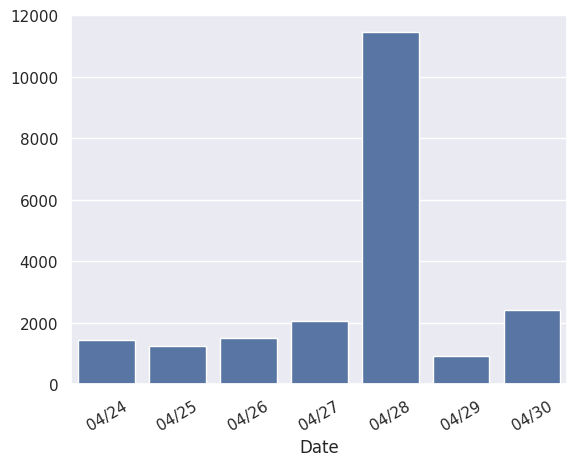

In [16]:
# Number of login attempts each day (not uniqued by IP)
by_day = login_attempts.groupby("Date").apply(lambda df: df["IP"].count(), include_groups=False)
g = sns.barplot(data=by_day)
g.set_xticks(g.get_xticks(), labels=g.get_xticklabels(), rotation=30);

<Axes: xlabel='Date'>

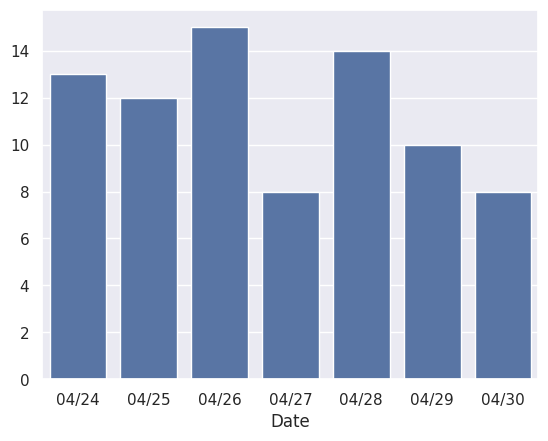

In [17]:
# Number of logins each day (not uniqued by IP)
by_day = logins.groupby("Date").apply(lambda df: df["IP"].count(), include_groups=False)
sns.barplot(data=by_day)

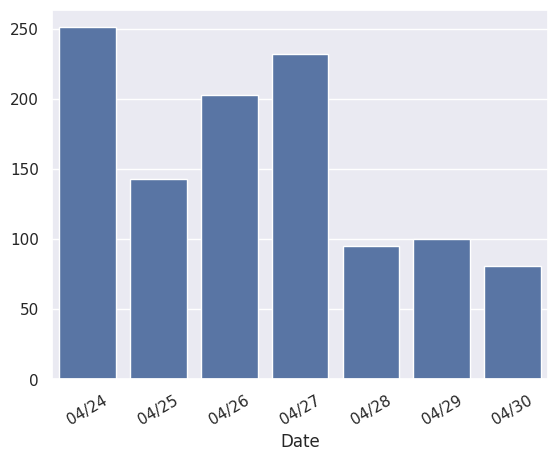

In [18]:
# Number of login attempts each day (uniqued by IP)
attempts_uniq_by_day = login_attempts.groupby(DATE_COL).apply(
    lambda df: df[IP_COL].drop_duplicates().count(), include_groups=False
)
g = sns.barplot(data=attempts_uniq_by_day)
g.set_xticks(g.get_xticks(), labels=g.get_xticklabels(), rotation=30);

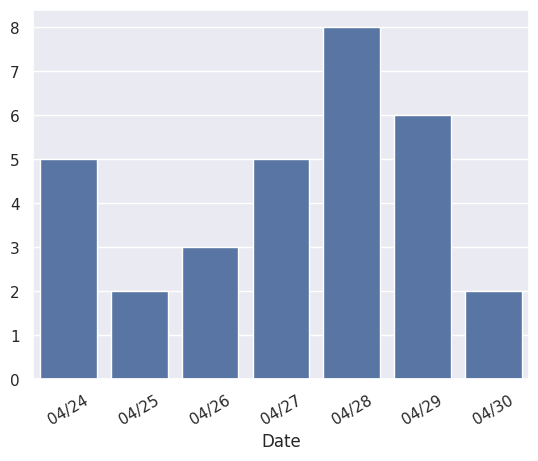

In [19]:
# Number of logins each day (uniqued by IP)
logins_uniq_by_day = logins.groupby(DATE_COL).apply(
    lambda df: df[IP_COL].drop_duplicates().count(), include_groups=False
)
g = sns.barplot(data=logins_uniq_by_day)
g.set_xticks(g.get_xticks(), labels=g.get_xticklabels(), rotation=30);

<Figure size 1200x1200 with 0 Axes>

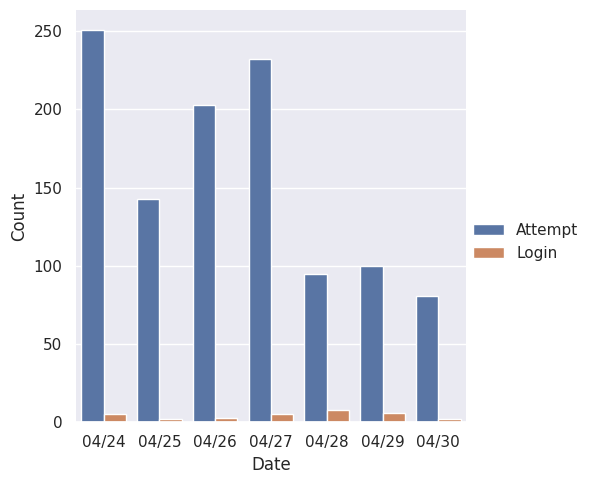

In [20]:
# Number of logins and login attempts each day (uniqued by IP)
both_uniq_by_day = pd.concat(
    [
        pd.DataFrame(
            {
                "Count": attempts_uniq_by_day,
                "Type": "Attempt",
            }
        ),
        pd.DataFrame(
            {
                "Count": logins_uniq_by_day,
                "Type": "Login",
            }
        ),
    ]
)

plt.figure(figsize=(12, 12))
g = sns.catplot(data=both_uniq_by_day, kind="bar", x="Date", y="Count", hue="Type")
g.despine(left=True)
g.legend.set_title("")

<Axes: xlabel='Time', ylabel='count'>

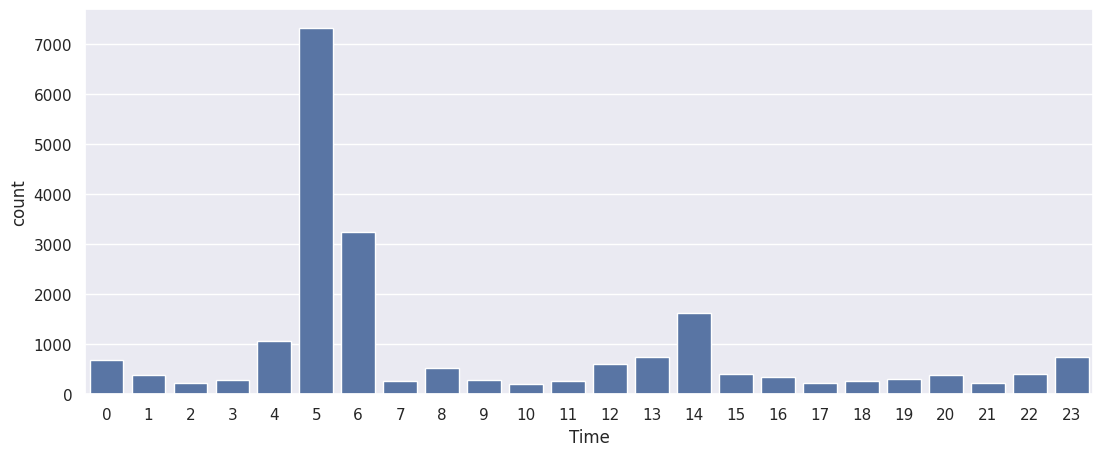

In [21]:
times_of_day = login_attempts[TIME_COL].apply(lambda dt: dt.hour)

plt.figure(figsize=(13, 5))
sns.barplot(data=times_of_day.value_counts())

# Web stuff